**Question 1**

Standard deviation measures the spread of individual data points around the mean in a dataset. In contrast, the standard error of the mean measures the standard deviation of the sampling distribution of the sample mean. This sampling distribution is derived by taking different independent samples from the population (the entire group of data points we are interested in), or alternatively, by re-sampling several times from one original sample (bootstrapping). 

Hence, the standard error of the mean is a measure of the variability of the sample mean as an estimate of the population mean.

**Question 2**



We know that the distribution of bootstrapped sample means typically follows a normal distribution according to the Central Limit Theorem, especially as the sample size becomes large. A 95% confidence interval covers the middle 95% of the distribution of the sample means. In a normal distribution, approximately 95% of the values lie within 1.96 standard deviations from the mean, or the standard error of the mean (SEM) in this context. Thus, we obtain a 95% confidence interval for the bootstrapped sample means by calculating a lower bound, which is the mean of the bootstrapped sample means less 1.96 times the SEM, and an upper bound, which is the mean of the bootstrapped sample means plus 1.96 times the SEM. 

**Question 3**

A 95% bootstrapped confidence interval can be calculated as the range between the 2.5th percentile and the 97.5th percentile of a collection of bootstrapped sample means. These represent the lower and upper bounds of the 95% confidence interval. In Python, the 2.5th percentile and 97.5th percentile can be obtained through the np.quantile() function, which can provide a distribution-free method for calculating confidence intervals, meaning that we do not need to assume the distribution of the data (such as normality). Therefore, it is an alternative to using the SEM to derive a 95% confidence interval.

**Question 4**

In [64]:
import numpy as np

# Sample data
data = np.array([12, 15, 14, 10, 13, 12, 14, 16, 11, 13])

# Number of bootstrap samples
n_iterations = 10000

# Bootstrap sample size (should be the same as the original sample size)
sample_size = len(data)

# List to store the bootstrapped means. 
# A list should be created in the same way for different population parameters, but perhaps with a different name for the
# sake of clarity (for instance, boostrapped_median = [] if we want to estimate the population median.)
bootstrapped_means = []

# Bootstrap resampling loop (which should run 'n_iterations' times)
for _ in range(n_iterations):
    # Resample the data with replacement: Take a random data point from the original sample with replacement. Repeat this 
    # step until we have obtained a bootstrap sample with the same size as the original sample size.
    # Loop runs until we obtain 'n_iterations' worth of bootstrapped samples.
    boot_sample = np.random.choice(data, size=sample_size, replace=True)
    
    # Calculate the statistic of interest (mean in this case) and store it
    bootstrapped_means.append(np.mean(boot_sample))  # Replace np.mean with another statistic if needed.
                                                     # For instance, we could use np.median(boot_sample), 
                                                     # np.std(boot_sample), np.var(boot_sample), ...

# Convert list to array for easier computation
bootstrapped_means = np.array(bootstrapped_means)

# Compute the 95% confidence interval using quantiles
ci_lower = np.quantile(bootstrapped_means, 0.025)  # 2.5th percentile (lower bound)
ci_upper = np.quantile(bootstrapped_means, 0.975)  # 97.5th percentile (upper bound)

# Print the 95% confidence interval for the population mean
print(f"95% Bootstrapped CI for the mean: [{ci_lower}, {ci_upper}]")

95% Bootstrapped CI for the mean: [11.9, 14.1]


**ChatBot session summary:**

Interaction Summary:
Difference Between Standard Error of the Mean and Standard Deviation:

Standard Deviation (SD) measures the spread of individual data points around the mean, reflecting the variability in the data.
Standard Error of the Mean (SEM) measures the precision of the sample mean as an estimate of the population mean, decreasing as the sample size increases.
SD is concerned with the variability in the dataset itself, while SEM is concerned with the variability of the sample mean.
Creating a 95% Confidence Interval Using SEM:

To create a 95% confidence interval using SEM, you multiply the SEM by 1.96 (the critical value for a normal distribution at 95% confidence).
Formula: \text{95% CI} = \bar{x} \pm 1.96 \times SEM, where 
𝑥
ˉ
x
ˉ
  is the sample mean.
Bootstrapped Confidence Interval Without SEM:

Instead of using SEM, you can create a bootstrapped 95% confidence interval by resampling the data multiple times, calculating the statistic (e.g., mean) for each sample, and using the quantiles of these resampled means to form the confidence interval.
The 2.5th and 97.5th percentiles of the bootstrapped sample means represent the lower and upper bounds of the 95% confidence interval.
The function np.quantile() is used to extract these percentiles from the bootstrapped sample means.
Python Code to Create a Bootstrapped Confidence Interval:

I provided Python code to generate a 95% bootstrapped confidence interval for a population mean. The code involves generating many resampled datasets (bootstrapped samples), computing the mean of each, and finding the 2.5th and 97.5th percentiles.
Additionally, I explained how the same approach can be modified to create confidence intervals for other population parameters, such as the median, by replacing np.mean() with np.median().
This summary includes key points from our discussion on confidence intervals, both using the standard error of the mean and bootstrapping, as well as how to modify bootstrapping code to estimate different population parameters.

**ChatBot transcript log:**
https://chatgpt.com/share/66feb0b3-0020-8012-aec6-d845b30135fc

**Question 5**

The population parameter is a fixed, unknown value that describes a characteristic of the entire population. It is said to be unknown because gathering data from an entire population is often impractical or impossible, unless the population is really small. In contrast, the sample statistic is an estimate based on a sample taken from the population. It varies from sample to sample because different samples may yield different results due to random variation (assuming samples are independent).

The purpose of a confidence interval is to use the sample statistic to estimate the population parameter. The sample statistic is at the center of the confidence interval, and the interval provides a range within which we believe the true population parameter lies with a certain level of confidence, if infinitely many different independent samples were hypothetically taken from the population. Confidence intervals therefore help us account for the variability in the sample statistic by providing a range of plausible values for the population parameter. This uncertainty reflects the fact that the sample statistic is just an estimate, not the true value represented by the population parameter.

**Question 6**

**1. What is the process of bootstrapping?**

Let's say we want to know the average height of all Canadian residents. We call the entire group of people we're actually interested in to be our 'population'. In this case, it's all the people currently living in Canada. We could start by taking a sample of, say 100 people, from our population. We want to ensure we're not biased in our selection so that every person has an equal chance of being selected in our sample, regardless of age, gender or the province where they live.

Bootstrapping is a technique where you take your sample and treat it like it’s the entire population. You then randomly draw new samples of the same size with replacement from that original sample, over and over again. So, imagine we numbered everyone in our original sample from 1 to 100 and paired their number with their height. You then keep choosing a number between 1 and 100 at random, recording the height associated with that number, then putting that number back, and pulling again. This means you can choose the same number more than once. You repeat this random selection until you've randomly selected 100 numbers and recorded the heights for each. We now have a bootstrap sample. We could further repeat the entire process of randomly choosing with replacement from our original sample to obtain many bootstrap samples. It's like simulating the same process of sampling 100 people from our population many times over.

**2. What is the main purpose of bootstrapping?**

The whole point of bootstrapping is to estimate how spread out our data is without making assumptions about what our population distribution looks like. To clarify, the population distribution simply shows how common different values are in the whole group of people we're interested in. So, if you want to know how confident you are about the average height of Canadian residents, bootstrapping helps by giving you a bunch of similar datasets to play with. It’s useful when you can’t or don’t want to rely on some strict mathematical formulas about the population distribution, for which we're not sure if those formulas apply to our population to begin with.

**3. If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your (hypothesized) guess might be plausible?**

Let’s say you think the average height in a population is 5'7", and we have a sample of n people from that population. From the example we talked about, our 'n' will be 100. To check if your guess might be reasonable, you can use bootstrapping. You’d create lots of new samples from your original one and calculate the average height for each of those new samples. After that, you'd get a distribution of those averages, which shows you how common different averages are from all the bootstrap samples you made.

Now, you can look at where your hypothesized average (5'7") fits in that distribution. If it falls within the range of most of those averages (let’s say the middle 95%), your guess could be plausible. If it’s way outside that range, then maybe your guess isn’t right.

**Question 7**

Even if the sample shows a mean that isn't exactly zero, if the confidence interval around that mean includes zero, it means that zero could still be a plausible value for the true average effect in the population. Since zero (no effect) is still a possibility, we cannot reject the null hypothesis.

We would reject the null hypothesis if the confidence interval does not include zero. This would mean that all the values in the confidence interval suggest a consistent effect (either positive or negative), and zero (no effect) is not a likely value for the true average effect. In this case, we would be more confident that the drug is actually doing something on average, either helping or harming, and not just having no effect.

**Question 8**

**_1. Problem Introduction_**

The company AliTech has created a new vaccine that aims to improve the health of the people who take it. We will analyse the data provided by AliTech to give evidence for whether or not the vaccine is effective.

**Hypotheses**

The null hypothesis in this context states that the vaccine has no effect on the health scores of patients. In other words, the difference between the final health score and initial health score is on average zero. The alternative hypothesis will be that the null hypothesis is false, or the vaccine does have an effect on patient health.

In [65]:
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/Kenshin1504/STA130/refs/heads/main/health_scores.csv")
data

,PatientID,Age,Gender,InitialHealthScore,FinalHealthScore
0,1,45,M,84,86
1,2,34,F,78,86
2,3,29,M,83,80
3,4,52,F,81,86
4,5,37,M,81,84
5,6,41,F,80,86
6,7,33,M,79,86
7,8,48,F,85,82
8,9,26,M,76,83
9,10,39,F,83,84


In [70]:
data.describe()

,PatientID,Age,InitialHealthScore,FinalHealthScore
count,10.00000,10.00000,10.000000,10.000000
mean,5.50000,38.40000,81.000000,84.300000
std,3.02765,8.30261,2.828427,2.110819
min,1.00000,26.00000,76.000000,80.000000
25%,3.25000,33.25000,79.250000,83.250000
50%,5.50000,38.00000,81.000000,85.000000
75%,7.75000,44.00000,83.000000,86.000000
max,10.00000,52.00000,85.000000,86.000000


**Data Visualisation**

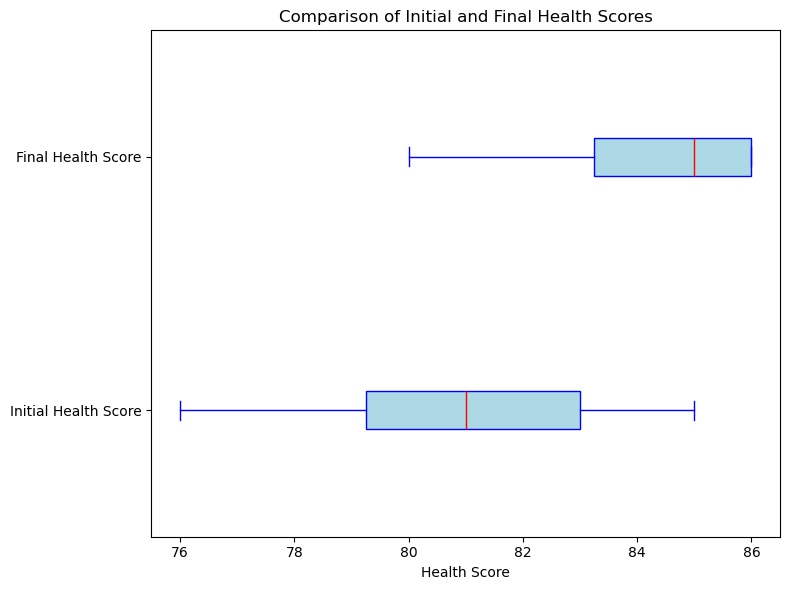

In [71]:
import matplotlib.pyplot as plt

# Create a figure
fig, ax = plt.subplots(figsize=(8, 6))

# Plot horizontal box plots for Initial and Final Health Scores
ax.boxplot([data['InitialHealthScore'], data['FinalHealthScore']], 
           vert=False, patch_artist=True, 
           boxprops=dict(facecolor='lightblue', color='blue'),
           whiskerprops=dict(color='blue'),
           capprops=dict(color='blue'),
           medianprops=dict(color='red'))

# Set the labels
ax.set_yticklabels(['Initial Health Score', 'Final Health Score'])
ax.set_xlabel('Health Score')
ax.set_title('Comparison of Initial and Final Health Scores')

# Display the plot
plt.tight_layout()
plt.savefig('health_scores_comparison.png', format='png')
plt.show()

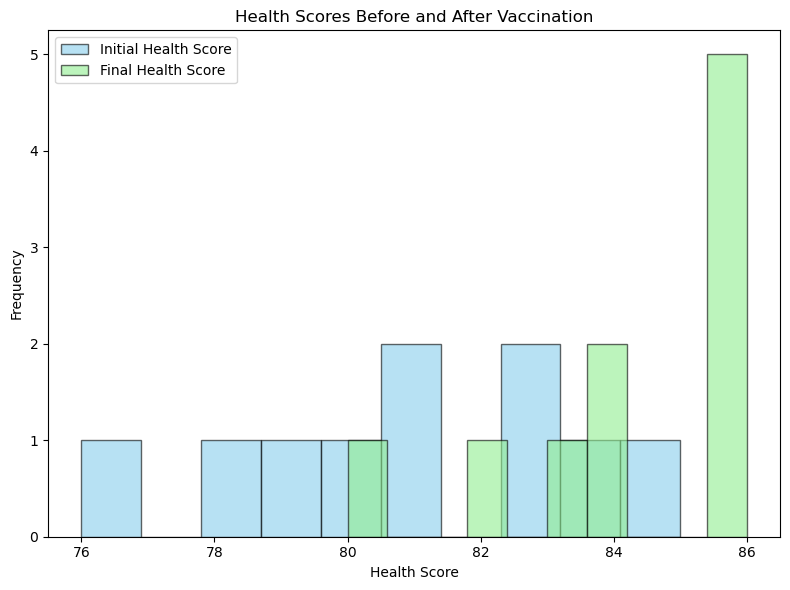

In [72]:
# Create a figure
plt.figure(figsize=(8, 6))

# Plot overlapping histograms for Initial and Final Health Scores
plt.hist(data['InitialHealthScore'], bins=10, color='skyblue', edgecolor='black', alpha=0.6, label='Initial Health Score')
plt.hist(data['FinalHealthScore'], bins=10, color='lightgreen', edgecolor='black', alpha=0.6, label='Final Health Score')

# Add labels and title
plt.xlabel('Health Score')
plt.ylabel('Frequency')
plt.title('Health Scores Before and After Vaccination')

# Add a legend to differentiate between the two histograms
plt.legend()

# Display the plot
plt.tight_layout()
plt.savefig('health_scores_comparison.png', format='png')
plt.show()

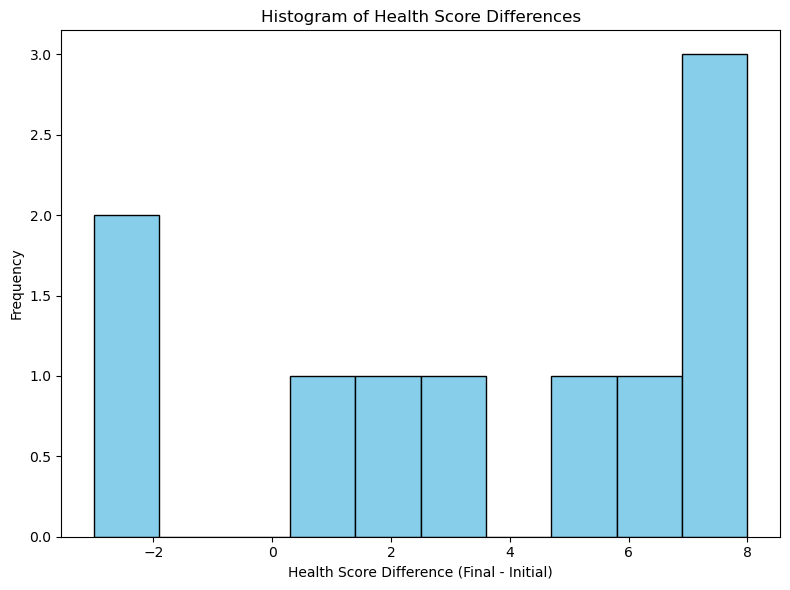

In [73]:
# Calculate the difference between final and initial health scores
data['health_score_difference'] = data['FinalHealthScore'] - data['InitialHealthScore']

# Create a histogram for the health score difference
plt.figure(figsize=(8, 6))
plt.hist(data['health_score_difference'], bins=10, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Health Score Difference (Final - Initial)')
plt.ylabel('Frequency')
plt.title('Histogram of Health Score Differences')

# Display the plot
plt.tight_layout()
plt.savefig("health_score_difference_histogram.png", format="png", dpi=300)
plt.show()

**_2. Quantitative Analysis_**

**Methodology**

Given the information on the health score difference of the 10 patients, we will use bootstrapping to estimate the average effect of the vaccine on health scores and assess whether this effect is statistically significant. We will use the health score difference of each of the 10 patients (visualised through the histogram of health score differences) as the base sample from which we will perform bootstrapping. The purpose of bootstrapping is to measure the variability of the sample mean and use this to create a confidence interval providing inference on the population mean. This confidence interval will be necessary to determine whether the hypothesised mean (0, meaning the vaccine has no effect) should be rejected or not.

The suitability of bootstrapping is further enhanced by the fact that we do not need to rely on normality assumptions. It is particularly useful in this scenario, where the sample size is small (n=10), and the health score differences may not follow a normal distribution.

The bootstrapping procedure is explained through the code below, which simulates re-sampling from the original sample 10,000 times. We are assuming that the original sample of 10 patients is representative of the population and free from bias or error.

In [75]:
# Original sample of health score differences
health_score_differences = df['FinalHealthScore'] - df['InitialHealthScore']
data = np.array(health_score_differences)

# Number of bootstrap samples
n_iterations = 10000

# Bootstrap sample size (should be the same as the original sample size)
sample_size = len(data)

# List to store the bootstrapped means. 
bootstrapped_means = []

# Bootstrap resampling loop (which should run 'n_iterations' times)
np.random.seed(100)
for _ in range(n_iterations):
    # Resample the data with replacement: Take a random data point from the original sample with replacement. Repeat this 
    # step until we have obtained a bootstrap sample with the same size as the original sample size.
    # Loop runs until we obtain 'n_iterations' worth of bootstrapped samples.
    boot_sample = np.random.choice(data, size=sample_size, replace=True)
    
    # Calculate the statistic of interest (mean of health score differences) and store it
    bootstrapped_means.append(np.mean(boot_sample))  

**Visualisation of sampling distribution**

We have obtained 10,000 bootstrapped samples from the original sample, and calculated the mean health score difference for each of those 10,000 bootstrapped samples. We can now use the list of means, _boostrapped_means_, to visualise the sampling distribution of the bootstrapped means:

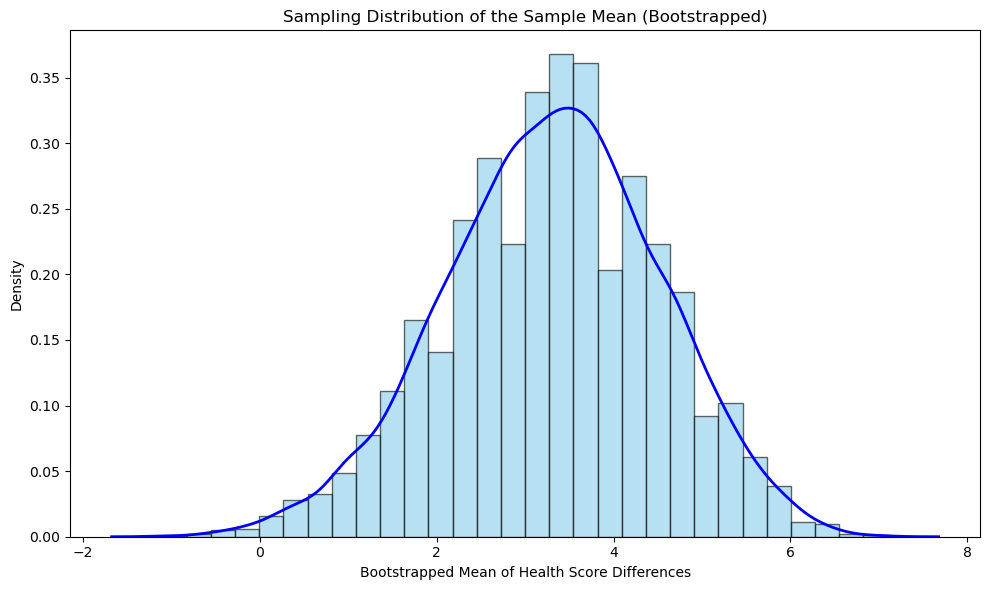

In [76]:
# Create a histogram for the bootstrapped means
plt.figure(figsize=(10, 6))
plt.hist(bootstrapped_means, bins=30, color='skyblue', edgecolor='black', alpha=0.6, density=True)

# Overlay a line plot for the kernel density estimation
sns.kdeplot(bootstrapped_means, color='blue', linewidth=2)

# Add labels and title
plt.xlabel('Bootstrapped Mean of Health Score Differences')
plt.ylabel('Density')
plt.title('Sampling Distribution of the Sample Mean (Bootstrapped)')

# Display the plot
plt.tight_layout()
plt.savefig("bootstrapped_means_distribution.png", format="png", dpi=300)
plt.show()

**Calculation of the Confidence Interval**

From the list of bootstrapped means, we can construct a 95% confidence interval as the range between the 2.5th percentile and the 97.5th percentile of the collection of bootstrapped sample means of health score differences. These represent the lower and upper bounds of the 95% confidence interval respectively, and 95% of the bootstrapped means will lie within this interval. 

In [77]:
# Convert list to array for easier computation
bootstrapped_means = np.array(bootstrapped_means)

# Compute the 95% confidence interval using quantiles
ci_lower = np.quantile(bootstrapped_means, 0.025)  # 2.5th percentile (lower bound)
ci_upper = np.quantile(bootstrapped_means, 0.975)  # 97.5th percentile (upper bound)

# Print the 95% confidence interval for the population mean
print(f"95% Bootstrapped Confidence Interval for the mean: [{ci_lower}, {ci_upper}]")

95% Bootstrapped Confidence Interval for the mean: [0.9, 5.6]


**_3. Findings and Discussion_**

**Conclusion regarding a Null Hypothesis of "no effect"**

The 95% confidence interval excludes 0, so we reject the null hypothesis that the vaccine has no effect on the health of patients. There is sufficient evidence to suggest that the vaccine is effective at improving the health of patients, as all the values in the confidence interval suggest a positive effect on average of the vaccine on patient health.

**Further Considerations**

There are limitations to this test. It is not certain whether the original sample of 10 patients was independent and sufficiently representative of the population. The small sample size (n = 10) may also limit the validity of the bootstrapped data as a reliable estimate of the mean of health score differences. There could also be external factors beyond the control of this test, such as the lifestyles of the 10 patients. It is possible that patients with a negative health score difference happened to lead an unhealthy lifestyle, hampering the effectiveness of the vaccine. Conversely, it could have been the case that those with a positive health score difference lead a healthy lifestyle, and that the positive difference was a result of their lifestyle rather than the vaccine itself.

**ChatBot session summary:**

Summary of Interactions:
Distinction between Population Parameter and Sample Statistic:

We discussed the importance of distinguishing between the population parameter and sample statistic in the context of confidence intervals, emphasizing how sample statistics are used to estimate population parameters.
Box Plots for Health Scores:

You requested Python code to create horizontal box plots comparing initial and final health scores. The plots were modified to use color and displayed on the same axes.
Histograms for Health Scores:

I provided code to create two overlapping histograms for initial and final health scores, allowing for a visual comparison of their distributions.
Horizontal Strip Plot:

You requested a visualization to indicate frequency, and we created a strip plot that stacked points vertically based on the frequency of health score differences.
Histogram of Health Score Differences:

I provided code to create a histogram visualizing the frequency of health score differences, using your specified calculation method.
Bootstrapping Health Score Differences:

You shared code for bootstrapping the health score differences and requested a histogram and line plot to visualize the sampling distribution of the sample mean. I provided the code to create a histogram of the bootstrapped means with a kernel density estimation line plot.
Code Snippets Provided:
Code for creating horizontal box plots.
Code for overlapping histograms for initial and final health scores.
Code for a strip plot showing frequency of health score differences.
Code for a histogram of health score differences.
Code for visualizing the bootstrapped means with a histogram and KDE line plot.
User Preferences:
You specified a preference to calculate health score differences using data['FinalHealthScore'] - data['InitialHealthScore'].

**ChatBot transcript log:** https://chatgpt.com/share/66ff45d3-32c4-8012-8cc1-95e1ba3ebba0